<a href="https://colab.research.google.com/github/laraqeshta/AES/blob/main/Algorithms_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import time
import sys
import csv
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [ ]:
sys.setrecursionlimit(10**8)
#increases the maximum depth of interpreter stack. We are setting the new limit to 10^8.

This code implements **the Mergesort algorithm**, which is an efficient sorting algorithm based on the "Divide and Conquer" principle. The algorithm repeatedly splits the array into two halves until each part contains only one element, then merges these parts back together in the correct order.

In [ ]:
class Counter:
    def __init__(self):
        self.comparisons = 0
        self.moves = 0


#Mergesort
def mergesort(arr):
    cnt = Counter()

    def merge(left, right):
        i = j = 0
        merged = []
        while i < len(left) and j < len(right):
            cnt.comparisons += 1
            if left[i] <= right[j]:
                merged.append(left[i])
                i += 1
            else:
                merged.append(right[j])
                j += 1
            cnt.moves += 1
        merged.extend(left[i:])
        merged.extend(right[j:])
        cnt.moves += (len(left) - i) + (len(right) - j)
        return merged

    def _mergesort(a):
        if len(a) <= 1:
            return a
        mid = len(a) // 2
        left = _mergesort(a[:mid])
        right = _mergesort(a[mid:])
        return merge(left, right)

    sorted_arr = _mergesort(arr)
    return sorted_arr, cnt

This code implements **the Quicksort algorithm**, a highly efficient sorting method based on the "Divide and Conquer" principle. The algorithm selects a pivot element and partitions the array into two sub-arrays: elements smaller than the pivot and elements larger than the pivot. It then recursively sorts the sub-arrays

In [ ]:
#Quicksort
def quicksort(arr):
    cnt = Counter()
    a = arr[:]

    def partition(lo, hi):
        pivot_index = random.randint(lo, hi)
        a[pivot_index], a[hi] = a[hi], a[pivot_index]
        cnt.moves += 2
        pivot = a[hi]
        i = lo - 1
        for j in range(lo, hi):
            cnt.comparisons += 1
            if a[j] <= pivot:
                i += 1
                a[i], a[j] = a[j], a[i]
                cnt.moves += 2
        a[i + 1], a[hi] = a[hi], a[i + 1]
        cnt.moves += 2
        return i + 1

    def _quicksort(lo, hi):
        while lo < hi:
            p = partition(lo, hi)
            if p - lo < hi - p:
                _quicksort(lo, p - 1)
                lo = p + 1
            else:
                _quicksort(p + 1, hi)
                hi = p - 1

    _quicksort(0, len(a) - 1)
    return a, cnt

This code implements **the Heapsort algorithm**, which is a comparison-based sorting technique. It works by first converting the input array into a max-heap, then repeatedly extracting the largest element from the heap and moving it to the end of the array.

In [ ]:
#Heapsort
def heapsort(arr):
    cnt = Counter()
    a = arr[:]
    n = len(a)

    def heapify(n, i):
        largest = i
        left = 2 * i + 1
        right = 2 * i + 2

        if left < n:
            cnt.comparisons += 1
            if a[left] > a[largest]:
                largest = left
        if right < n:
            cnt.comparisons += 1
            if a[right] > a[largest]:
                largest = right
        if largest != i:
            a[i], a[largest] = a[largest], a[i]
            cnt.moves += 2
            heapify(n, largest)

    for i in range(n // 2 - 1, -1, -1):
        heapify(n, i)
    for i in range(n - 1, 0, -1):
        a[i], a[0] = a[0], a[i]
        cnt.moves += 2
        heapify(i, 0)

    return a, cnt

This **function** is designed to **create text files containing random integers**, which can then be used as input for sorting algorithms or other data processing tasks. It helps in generating various sizes of test data programmatically.

In [ ]:
def generate_input_files(sizes, folder="inputs"):
    Path(folder).mkdir(exist_ok=True)
    for n in sizes:
        filename = Path(folder) / f"input_n{n}.txt"
        if filename.exists():
            print(f"The file already exists: {filename}")
            continue
        print(f" Creating input file for size n = {n}...")
        random.seed(42)
        with open(filename, "w") as f:
            for _ in range(n):
                f.write(f"{random.randint(1, n)}\n")
        print(f" File created: {filename}")

This **function** is designed to **test** and benchmark different sorting algorithms using data from a file. It reads a list of numbers from a specified file, then runs multiple sorting algorithms on that data, measuring and reporting their performance metrics.

In [ ]:
def run_test_from_file(n, folder, results):
    filename = Path(folder) / f"input_n{n}.txt"
    with open(filename, "r") as f:
        arr = [int(line.strip()) for line in f]

    print(f"\n===Data size: n = {n} ===")
    for name, func in [("Mergesort", mergesort), ("Quicksort", quicksort), ("Heapsort", heapsort)]:
        data_copy = arr[:]
        start = time.time()
        sorted_arr, stats = func(data_copy)
        end = time.time()
        assert sorted_arr == sorted(arr), f"{name}  produced incorrect sorting"
        time_taken = end - start
        print(f"{name}: time = {time_taken:.4f} seconds, comparisons = {stats.comparisons}, moves  = {stats.moves}")
        results.append([n, name, time_taken, stats.comparisons, stats.moves])

This code  acts as the **main** program driver. It orchestrates the entire process of generating test data, running performance benchmarks on different sorting algorithms, and saving the results for later analysis.

In [ ]:
if __name__ == "__main__":
    sizes = [10**3, 10**5, 10**7, 10**8]
    input_folder = "inputs"
    results = []

    generate_input_files(sizes, input_folder)

    for n in sizes:
        run_test_from_file(n, input_folder, results)
    with open("sorting_results.csv", "w", newline="") as f:
        writer = csv.writer(f)
        writer.writerow(["n", "Algorithm", "Time (s)", "Comparisons", "Moves"])
        writer.writerows(results)
    print("\n Results saved to sorting_results.csv")


 Creating input file for size n = 1000...
 File created: inputs/input_n1000.txt
 Creating input file for size n = 100000...
 File created: inputs/input_n100000.txt
 Creating input file for size n = 10000000...
 File created: inputs/input_n10000000.txt
 Creating input file for size n = 100000000...
 File created: inputs/input_n100000000.txt

===Data size: n = 1000 ===
Mergesort: time = 0.0022 seconds, comparisons = 8694, moves  = 9976
Quicksort: time = 0.0017 seconds, comparisons = 11225, moves  = 12920
Heapsort: time = 0.0030 seconds, comparisons = 16867, moves  = 18194

===Data size: n = 100000 ===
Mergesort: time = 0.3440 seconds, comparisons = 1536031, moves  = 1668928
Quicksort: time = 0.3116 seconds, comparisons = 1999520, moves  = 2276556
Heapsort: time = 0.5553 seconds, comparisons = 3019230, moves  = 3149386

===Data size: n = 10000000 ===
Mergesort: time = 66.3296 seconds, comparisons = 220102476, moves  = 233222784
Quicksort: time = 70.6883 seconds, comparisons = 296894892, m

This code uses **Pandas** and **Matplotlib** to **visualize** the performance of the sorting algorithms. It takes the data stored in the results list, converts it into a structured DataFrame, and then generates a plot to compare the algorithms' running times.

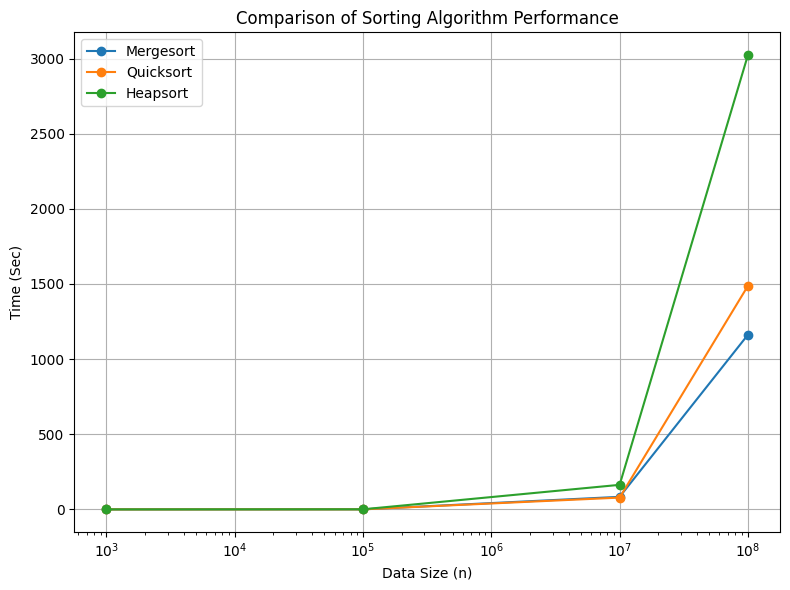

In [ ]:
df = pd.DataFrame(results, columns=["n", "Algorithm", "Time (s)", "Comparisons", "Moves"])

plt.figure(figsize=(8, 6))

for algo in df["Algorithm"].unique():
    subset = df[df["Algorithm"] == algo]
    plt.plot(subset["n"], subset["Time (s)"], marker="o", label=algo)

plt.xscale("log", base=10)
plt.xlabel("Data Size (n)")
plt.ylabel("Time (Sec)")
plt.title("Comparison of Sorting Algorithm Performance")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("sorting_performance.png", dpi=150)

